KeyError: 1

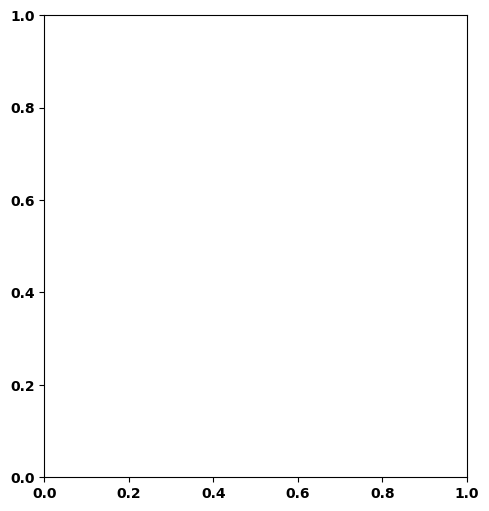

In [3]:
import json
import numpy as np
import matplotlib.pyplot as plt



In [ ]:
# Convert back the keys after loading the JSON (restore original types)
def convert_keys_from_string(d):
    new_dict = {}
    for key, value in d.items():
        # Example: converting back to int, but can be customized for tuples, etc.
        if key.isdigit():  # You can add more sophisticated type checks
            new_dict[int(key)] = value
        else:
            new_dict[key] = value
    return new_dict

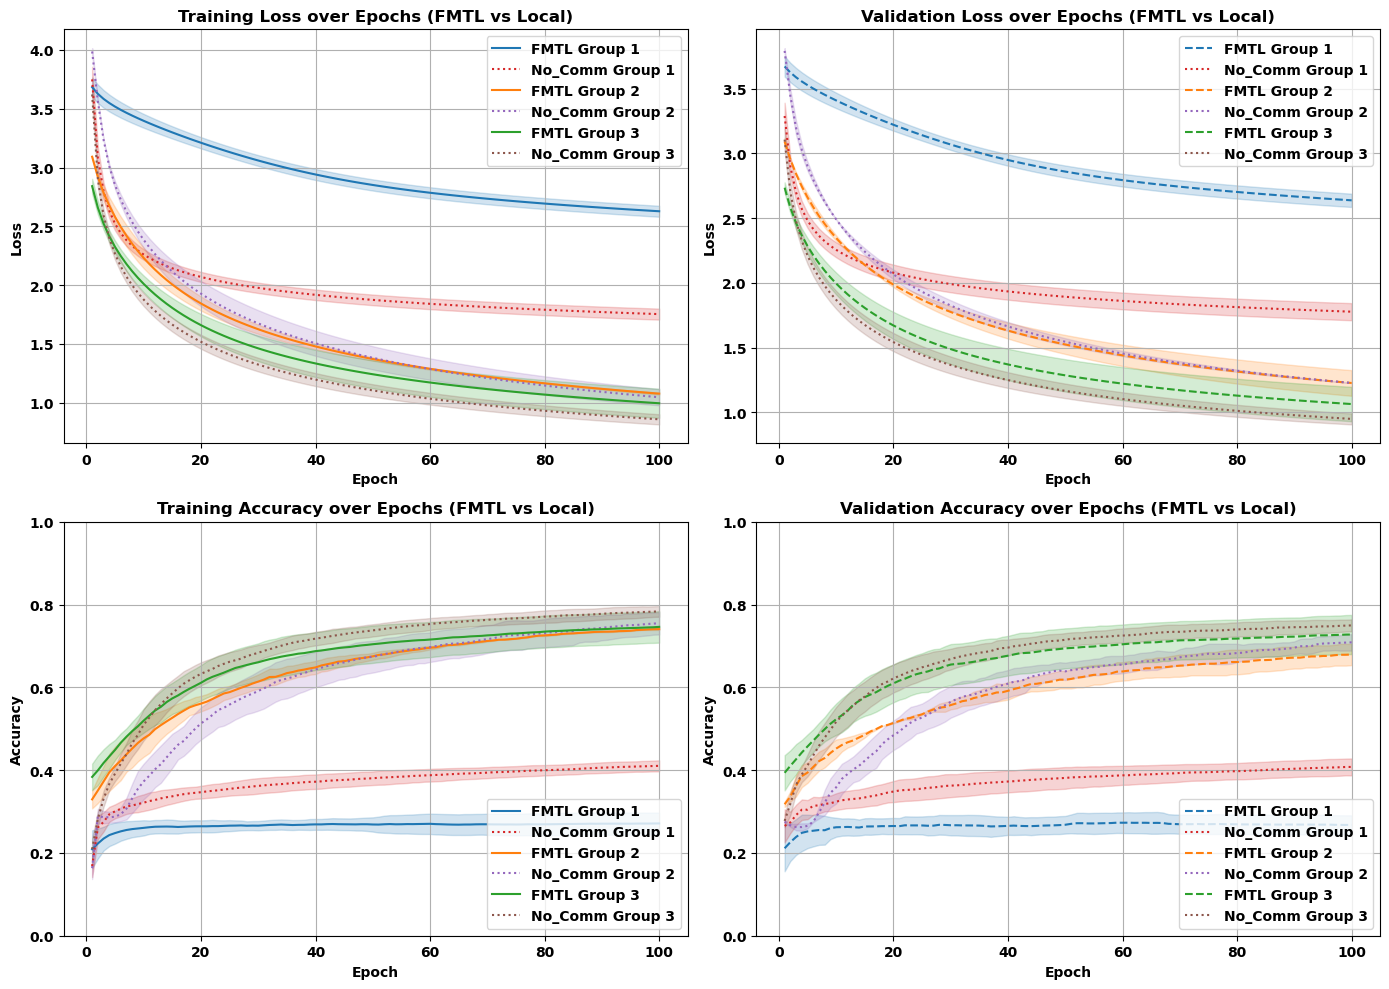

In [14]:
import json
import numpy as np
import matplotlib.pyplot as plt

# Define the path to the metrics files
metrics_directory = "./"
fmtl_metrics_file = f'{metrics_directory}FMTL_metrics.json'
no_comm_metrics_file = f'{metrics_directory}No_Comm_Metrics.json'

# Load the metrics from both JSON files
with open(fmtl_metrics_file, 'r') as f:
    fmtl_metrics = json.load(f)

with open(no_comm_metrics_file, 'r') as f:
    no_comm_metrics = json.load(f)

# Convert metrics to numpy arrays for easy manipulation
fmtl_group_train_loss_histories = {k: np.array(v) for k, v in fmtl_metrics['group_train_loss_mean'].items()}
fmtl_group_train_accuracy_histories = {k: np.array(v) for k, v in fmtl_metrics['group_train_acc_mean'].items()}
fmtl_group_val_loss_histories = {k: np.array(v) for k, v in fmtl_metrics['group_val_loss_mean'].items()}
fmtl_group_val_accuracy_histories = {k: np.array(v) for k, v in fmtl_metrics['group_val_acc_mean'].items()}

no_comm_group_train_loss_histories = {k: np.array(v) for k, v in no_comm_metrics['group_train_loss_mean'].items()}
no_comm_group_train_accuracy_histories = {k: np.array(v) for k, v in no_comm_metrics['group_train_acc_mean'].items()}
no_comm_group_val_loss_histories = {k: np.array(v) for k, v in no_comm_metrics['group_val_loss_mean'].items()}
no_comm_group_val_accuracy_histories = {k: np.array(v) for k, v in no_comm_metrics['group_val_acc_mean'].items()}

# Now load std values directly from the dictionary
fmtl_group_train_loss_std = {k: np.array(v) for k, v in fmtl_metrics['group_train_loss_std'].items()}
fmtl_group_val_loss_std = {k: np.array(v) for k, v in fmtl_metrics['group_val_loss_std'].items()}
fmtl_group_train_acc_std = {k: np.array(v) for k, v in fmtl_metrics['group_train_acc_std'].items()}
fmtl_group_val_acc_std = {k: np.array(v) for k, v in fmtl_metrics['group_val_acc_std'].items()}

no_comm_group_train_loss_std = {k: np.array(v) for k, v in no_comm_metrics['group_train_loss_std'].items()}
no_comm_group_val_loss_std = {k: np.array(v) for k, v in no_comm_metrics['group_val_loss_std'].items()}
no_comm_group_train_acc_std = {k: np.array(v) for k, v in no_comm_metrics['group_train_acc_std'].items()}
no_comm_group_val_acc_std = {k: np.array(v) for k, v in no_comm_metrics['group_val_acc_std'].items()}

# Combined Plot for FMTL and No_Comm Modalities
plt.figure(figsize=(14, 10))

# Loss Plot (Training Loss)
plt.subplot(2, 2, 1)
for group in ['1', '2', '3']:
    # Plot FMTL
    plt.plot(range(1, len(fmtl_group_train_loss_histories[group]) + 1), fmtl_group_train_loss_histories[group], label=f"FMTL Group {group}", color=f'C{int(group)-1}')
    plt.fill_between(range(1, len(fmtl_group_train_loss_histories[group]) + 1), 
                     fmtl_group_train_loss_histories[group] - fmtl_group_train_loss_std[group], 
                     fmtl_group_train_loss_histories[group] + fmtl_group_train_loss_std[group], 
                     alpha=0.2, color=f'C{int(group)-1}')
    
    # Plot No_Comm
    plt.plot(range(1, len(no_comm_group_train_loss_histories[group]) + 1), no_comm_group_train_loss_histories[group], label=f"No_Comm Group {group}", linestyle="dotted", color=f'C{int(group)+2}')
    plt.fill_between(range(1, len(no_comm_group_train_loss_histories[group]) + 1), 
                     no_comm_group_train_loss_histories[group] - no_comm_group_train_loss_std[group], 
                     no_comm_group_train_loss_histories[group] + no_comm_group_train_loss_std[group], 
                     alpha=0.2, color=f'C{int(group)+2}')

plt.title("Training Loss over Epochs (FMTL vs Local)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(loc='upper right')
plt.grid()

# Loss Plot (Validation Loss)
plt.subplot(2, 2, 2)
for group in ['1', '2', '3']:
    # Plot FMTL
    plt.plot(range(1, len(fmtl_group_val_loss_histories[group]) + 1), fmtl_group_val_loss_histories[group], label=f"FMTL Group {group}", linestyle="dashed", color=f'C{int(group)-1}')
    plt.fill_between(range(1, len(fmtl_group_val_loss_histories[group]) + 1), 
                     fmtl_group_val_loss_histories[group] - fmtl_group_val_loss_std[group], 
                     fmtl_group_val_loss_histories[group] + fmtl_group_val_loss_std[group], 
                     alpha=0.2, color=f'C{int(group)-1}')
    
    # Plot No_Comm
    plt.plot(range(1, len(no_comm_group_val_loss_histories[group]) + 1), no_comm_group_val_loss_histories[group], label=f"No_Comm Group {group}", linestyle="dotted", color=f'C{int(group)+2}')
    plt.fill_between(range(1, len(no_comm_group_val_loss_histories[group]) + 1), 
                     no_comm_group_val_loss_histories[group] - no_comm_group_val_loss_std[group], 
                     no_comm_group_val_loss_histories[group] + no_comm_group_val_loss_std[group], 
                     alpha=0.2, color=f'C{int(group)+2}')

plt.title("Validation Loss over Epochs (FMTL vs Local)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(loc='upper right')
plt.grid()

# Accuracy Plot (Training Accuracy)
plt.subplot(2, 2, 3)
for group in ['1', '2', '3']:
    # Plot FMTL
    plt.plot(range(1, len(fmtl_group_train_accuracy_histories[group]) + 1), fmtl_group_train_accuracy_histories[group], label=f"FMTL Group {group}", color=f'C{int(group)-1}')
    plt.fill_between(range(1, len(fmtl_group_train_accuracy_histories[group]) + 1), 
                     fmtl_group_train_accuracy_histories[group] - fmtl_group_train_acc_std[group], 
                     fmtl_group_train_accuracy_histories[group] + fmtl_group_train_acc_std[group], 
                     alpha=0.2, color=f'C{int(group)-1}')
    
    # Plot No_Comm
    plt.plot(range(1, len(no_comm_group_train_accuracy_histories[group]) + 1), no_comm_group_train_accuracy_histories[group], label=f"No_Comm Group {group}", linestyle="dotted", color=f'C{int(group)+2}')
    plt.fill_between(range(1, len(no_comm_group_train_accuracy_histories[group]) + 1), 
                     no_comm_group_train_accuracy_histories[group] - no_comm_group_train_acc_std[group], 
                     no_comm_group_train_accuracy_histories[group] + no_comm_group_train_acc_std[group], 
                     alpha=0.2, color=f'C{int(group)+2}')

plt.title("Training Accuracy over Epochs (FMTL vs Local)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.ylim([0, 1])  # Ensure y-axis is between 0 and 1 for accuracy
plt.legend(loc='lower right')
plt.grid()

# Accuracy Plot (Validation Accuracy)
plt.subplot(2, 2, 4)
for group in ['1', '2', '3']:
    # Plot FMTL
    plt.plot(range(1, len(fmtl_group_val_accuracy_histories[group]) + 1), fmtl_group_val_accuracy_histories[group], label=f"FMTL Group {group}", linestyle="dashed", color=f'C{int(group)-1}')
    plt.fill_between(range(1, len(fmtl_group_val_accuracy_histories[group]) + 1), 
                     fmtl_group_val_accuracy_histories[group] - fmtl_group_val_acc_std[group], 
                     fmtl_group_val_accuracy_histories[group] + fmtl_group_val_acc_std[group], 
                     alpha=0.2, color=f'C{int(group)-1}')
    
    # Plot No_Comm
    plt.plot(range(1, len(no_comm_group_val_accuracy_histories[group]) + 1), no_comm_group_val_accuracy_histories[group], label=f"No_Comm Group {group}", linestyle="dotted", color=f'C{int(group)+2}')
    plt.fill_between(range(1, len(no_comm_group_val_accuracy_histories[group]) + 1), 
                     no_comm_group_val_accuracy_histories[group] - no_comm_group_val_acc_std[group], 
                     no_comm_group_val_accuracy_histories[group] + no_comm_group_val_acc_std[group], 
                     alpha=0.2, color=f'C{int(group)+2}')

plt.title("Validation Accuracy over Epochs (FMTL vs Local)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.ylim([0, 1])  # Ensure y-axis is between 0 and 1 for accuracy
plt.legend(loc='lower right')
plt.grid()

plt.tight_layout()
plt.show()


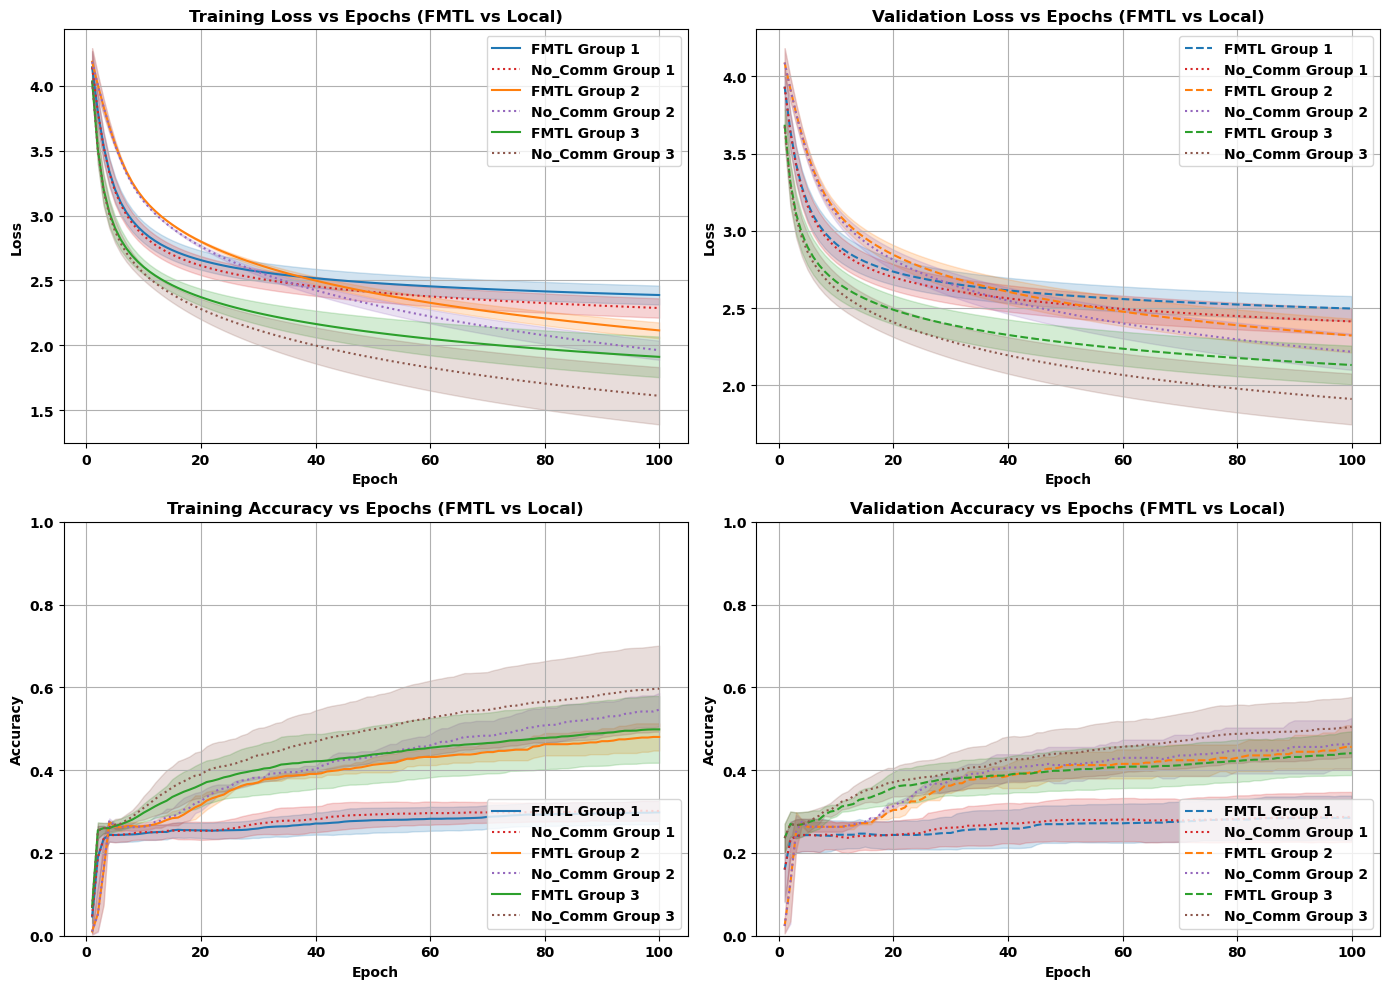

In [18]:
import json
import numpy as np
import matplotlib.pyplot as plt

# Define the path to the metrics files
metrics_directory = "./"
fmtl_metrics_file = f'{metrics_directory}FMTL_metrics_20.json'
no_comm_metrics_file = f'{metrics_directory}No_Comm_Metrics_20.json'

# Load the metrics from both JSON files
with open(fmtl_metrics_file, 'r') as f:
    fmtl_metrics = json.load(f)

with open(no_comm_metrics_file, 'r') as f:
    no_comm_metrics = json.load(f)

# Convert metrics to numpy arrays for easy manipulation
fmtl_group_train_loss_histories = {k: np.array(v) for k, v in fmtl_metrics['group_train_loss_mean'].items()}
fmtl_group_train_accuracy_histories = {k: np.array(v) for k, v in fmtl_metrics['group_train_acc_mean'].items()}
fmtl_group_val_loss_histories = {k: np.array(v) for k, v in fmtl_metrics['group_val_loss_mean'].items()}
fmtl_group_val_accuracy_histories = {k: np.array(v) for k, v in fmtl_metrics['group_val_acc_mean'].items()}

no_comm_group_train_loss_histories = {k: np.array(v) for k, v in no_comm_metrics['group_train_loss_mean'].items()}
no_comm_group_train_accuracy_histories = {k: np.array(v) for k, v in no_comm_metrics['group_train_acc_mean'].items()}
no_comm_group_val_loss_histories = {k: np.array(v) for k, v in no_comm_metrics['group_val_loss_mean'].items()}
no_comm_group_val_accuracy_histories = {k: np.array(v) for k, v in no_comm_metrics['group_val_acc_mean'].items()}

# Now load std values directly from the dictionary
fmtl_group_train_loss_std = {k: np.array(v) for k, v in fmtl_metrics['group_train_loss_std'].items()}
fmtl_group_val_loss_std = {k: np.array(v) for k, v in fmtl_metrics['group_val_loss_std'].items()}
fmtl_group_train_acc_std = {k: np.array(v) for k, v in fmtl_metrics['group_train_acc_std'].items()}
fmtl_group_val_acc_std = {k: np.array(v) for k, v in fmtl_metrics['group_val_acc_std'].items()}

no_comm_group_train_loss_std = {k: np.array(v) for k, v in no_comm_metrics['group_train_loss_std'].items()}
no_comm_group_val_loss_std = {k: np.array(v) for k, v in no_comm_metrics['group_val_loss_std'].items()}
no_comm_group_train_acc_std = {k: np.array(v) for k, v in no_comm_metrics['group_train_acc_std'].items()}
no_comm_group_val_acc_std = {k: np.array(v) for k, v in no_comm_metrics['group_val_acc_std'].items()}

# Combined Plot for FMTL and No_Comm Modalities
plt.figure(figsize=(14, 10))

# Loss Plot (Training Loss)
plt.subplot(2, 2, 1)
for group in ['1', '2', '3']:
    # Plot FMTL
    plt.plot(range(1, len(fmtl_group_train_loss_histories[group]) + 1), fmtl_group_train_loss_histories[group], label=f"FMTL Group {group}", color=f'C{int(group)-1}')
    plt.fill_between(range(1, len(fmtl_group_train_loss_histories[group]) + 1), 
                     fmtl_group_train_loss_histories[group] - fmtl_group_train_loss_std[group], 
                     fmtl_group_train_loss_histories[group] + fmtl_group_train_loss_std[group], 
                     alpha=0.2, color=f'C{int(group)-1}')
    
    # Plot No_Comm
    plt.plot(range(1, len(no_comm_group_train_loss_histories[group]) + 1), no_comm_group_train_loss_histories[group], label=f"No_Comm Group {group}", linestyle="dotted", color=f'C{int(group)+2}')
    plt.fill_between(range(1, len(no_comm_group_train_loss_histories[group]) + 1), 
                     no_comm_group_train_loss_histories[group] - no_comm_group_train_loss_std[group], 
                     no_comm_group_train_loss_histories[group] + no_comm_group_train_loss_std[group], 
                     alpha=0.2, color=f'C{int(group)+2}')

plt.title("Training Loss vs Epochs (FMTL vs Local)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(loc='upper right')
plt.grid()

# Loss Plot (Validation Loss)
plt.subplot(2, 2, 2)
for group in ['1', '2', '3']:
    # Plot FMTL
    plt.plot(range(1, len(fmtl_group_val_loss_histories[group]) + 1), fmtl_group_val_loss_histories[group], label=f"FMTL Group {group}", linestyle="dashed", color=f'C{int(group)-1}')
    plt.fill_between(range(1, len(fmtl_group_val_loss_histories[group]) + 1), 
                     fmtl_group_val_loss_histories[group] - fmtl_group_val_loss_std[group], 
                     fmtl_group_val_loss_histories[group] + fmtl_group_val_loss_std[group], 
                     alpha=0.2, color=f'C{int(group)-1}')
    
    # Plot No_Comm
    plt.plot(range(1, len(no_comm_group_val_loss_histories[group]) + 1), no_comm_group_val_loss_histories[group], label=f"No_Comm Group {group}", linestyle="dotted", color=f'C{int(group)+2}')
    plt.fill_between(range(1, len(no_comm_group_val_loss_histories[group]) + 1), 
                     no_comm_group_val_loss_histories[group] - no_comm_group_val_loss_std[group], 
                     no_comm_group_val_loss_histories[group] + no_comm_group_val_loss_std[group], 
                     alpha=0.2, color=f'C{int(group)+2}')

plt.title("Validation Loss vs Epochs (FMTL vs Local)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(loc='upper right')
plt.grid()

# Accuracy Plot (Training Accuracy)
plt.subplot(2, 2, 3)
for group in ['1', '2', '3']:
    # Plot FMTL
    plt.plot(range(1, len(fmtl_group_train_accuracy_histories[group]) + 1), fmtl_group_train_accuracy_histories[group], label=f"FMTL Group {group}", color=f'C{int(group)-1}')
    plt.fill_between(range(1, len(fmtl_group_train_accuracy_histories[group]) + 1), 
                     fmtl_group_train_accuracy_histories[group] - fmtl_group_train_acc_std[group], 
                     fmtl_group_train_accuracy_histories[group] + fmtl_group_train_acc_std[group], 
                     alpha=0.2, color=f'C{int(group)-1}')
    
    # Plot No_Comm
    plt.plot(range(1, len(no_comm_group_train_accuracy_histories[group]) + 1), no_comm_group_train_accuracy_histories[group], label=f"No_Comm Group {group}", linestyle="dotted", color=f'C{int(group)+2}')
    plt.fill_between(range(1, len(no_comm_group_train_accuracy_histories[group]) + 1), 
                     no_comm_group_train_accuracy_histories[group] - no_comm_group_train_acc_std[group], 
                     no_comm_group_train_accuracy_histories[group] + no_comm_group_train_acc_std[group], 
                     alpha=0.2, color=f'C{int(group)+2}')

plt.title("Training Accuracy vs Epochs (FMTL vs Local)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.ylim([0, 1])  # Ensure y-axis is between 0 and 1 for accuracy
plt.legend(loc='lower right')
plt.grid()

# Accuracy Plot (Validation Accuracy)
plt.subplot(2, 2, 4)
for group in ['1', '2', '3']:
    # Plot FMTL
    plt.plot(range(1, len(fmtl_group_val_accuracy_histories[group]) + 1), fmtl_group_val_accuracy_histories[group], label=f"FMTL Group {group}", linestyle="dashed", color=f'C{int(group)-1}')
    plt.fill_between(range(1, len(fmtl_group_val_accuracy_histories[group]) + 1), 
                     fmtl_group_val_accuracy_histories[group] - fmtl_group_val_acc_std[group], 
                     fmtl_group_val_accuracy_histories[group] + fmtl_group_val_acc_std[group], 
                     alpha=0.2, color=f'C{int(group)-1}')
    
    # Plot No_Comm
    plt.plot(range(1, len(no_comm_group_val_accuracy_histories[group]) + 1), no_comm_group_val_accuracy_histories[group], label=f"No_Comm Group {group}", linestyle="dotted", color=f'C{int(group)+2}')
    plt.fill_between(range(1, len(no_comm_group_val_accuracy_histories[group]) + 1), 
                     no_comm_group_val_accuracy_histories[group] - no_comm_group_val_acc_std[group], 
                     no_comm_group_val_accuracy_histories[group] + no_comm_group_val_acc_std[group], 
                     alpha=0.2, color=f'C{int(group)+2}')

plt.title("Validation Accuracy vs Epochs (FMTL vs Local)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.ylim([0, 1])  # Ensure y-axis is between 0 and 1 for accuracy
plt.legend(loc='lower right')
plt.grid()

plt.tight_layout()
plt.show()
